# Analyse Stock Price Data of a selected Timeframe

## Install TA-Lib

In [1]:
# conda install -c conda-forge ta-lib

In [2]:
# !pip install yfinance
# !pip install TA-Lib
# !pip install fredapi
# !pip install yahooquery
# !pip install yahoo_fin

In [3]:
import numpy as np
import pandas as pd
import yfinance as yf
import yahooquery as yq
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import talib
from fredapi import Fred
import warnings
warnings.filterwarnings('ignore')

In [4]:
start_date = dt.datetime(2013, 3, 1).date()
end_date = dt.datetime(2023, 3, 1).date()
ticker = 'WMT'
data = yf.download(ticker, start_date, end_date)
data.index = data.index.date
data

[*********************100%***********************]  1 of 1 completed


Open        High         Low       Close   Adj Close  \
2013-03-01   70.779999   71.900002   70.779999   71.739998   57.221935   
2013-03-04   71.519997   73.260002   71.510002   73.260002   58.434338   
2013-03-05   73.470001   74.040001   72.989998   73.720001   58.801243   
2013-03-06   73.750000   74.129997   73.250000   73.379997   58.530048   
2013-03-07   73.489998   73.610001   73.199997   73.320000   58.482189   
...                ...         ...         ...         ...         ...   
2023-02-22  146.770004  147.570007  142.759995  144.240005  143.651230   
2023-02-23  144.369995  144.369995  140.710007  142.089996  141.509995   
2023-02-24  140.839996  142.740005  139.529999  142.470001  141.888458   
2023-02-27  142.710007  143.089996  140.660004  141.440002  140.862656   
2023-02-28  141.000000  142.649994  140.949997  142.130005  141.549850   

              Volume  
2013-03-01   8902300  
2013-03-04  10567200  
2013-03-05   9142000  
2013-03-06   7149600  
2013-03-07   6680000  
...              ...  
2023-02-22   9948000  
2023-02-23   7340400  
2023-02-24   6874500  
2023-02-27   5549100  
2023-02-28   6018000  

[2517 rows x 6 columns]

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2517 entries, 2013-03-01 to 2023-02-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2517 non-null   float64
 1   High       2517 non-null   float64
 2   Low        2517 non-null   float64
 3   Close      2517 non-null   float64
 4   Adj Close  2517 non-null   float64
 5   Volume     2517 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 137.6+ KB


In [6]:
data.describe().applymap("{0:.5f}".format).T

count           mean            std            min  \
Open       2517.00000       99.51776       28.64718       56.39000   
High       2517.00000      100.33248       28.95850       57.06000   
Low        2517.00000       98.76988       28.34429       56.30000   
Close      2517.00000       99.54899       28.63786       56.42000   
Adj Close  2517.00000       91.69063       31.80045       48.17340   
Volume     2517.00000  8117464.32261  4593638.67536  2094900.00000   

                     25%            50%            75%             max  
Open            75.27000       87.94000      128.03000       160.25000  
High            75.75000       88.72000      129.84000       160.77000  
Low             74.86000       87.38000      126.61000       159.07001  
Close           75.26000       88.06000      128.00000       159.87000  
Adj Close       62.95467       80.28654      123.87957       157.35965  
Volume     5693500.00000  6952900.00000  9151900.00000  80898100.00000

#### Add simple moving average of 30 days and exponential moving average of smoothing constant at $\alpha$ = 0.3

In [7]:
data['30MA'] = data['Close'].rolling(window=30).mean()
data['50MA'] = data['Close'].rolling(window=50).mean()
data['200MA'] = data['Close'].rolling(window=200).mean()
data['EMA_0.3'] = data['Close'].ewm(alpha=0.3, adjust=False).mean()
data.tail()

Open        High         Low       Close   Adj Close  \
2023-02-22  146.770004  147.570007  142.759995  144.240005  143.651230   
2023-02-23  144.369995  144.369995  140.710007  142.089996  141.509995   
2023-02-24  140.839996  142.740005  139.529999  142.470001  141.888458   
2023-02-27  142.710007  143.089996  140.660004  141.440002  140.862656   
2023-02-28  141.000000  142.649994  140.949997  142.130005  141.549850   

             Volume        30MA      50MA      200MA     EMA_0.3  
2023-02-22  9948000  143.420334  143.7778  136.33490  145.330001  
2023-02-23  7340400  143.328000  143.7134  136.29755  144.358000  
2023-02-24  6874500  143.206000  143.6024  136.25335  143.791600  
2023-02-27  5549100  143.093667  143.4814  136.21465  143.086121  
2023-02-28  6018000  142.988334  143.3906  136.18720  142.799286

In [8]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# data = pd.read_csv("TSLA.csv", parse_dates=True)

# Create subplots and mention plot grid size
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, 
               vertical_spacing=0.03, row_width=[1.7, 1.7])

# Plot OHLC on 1st row
fig.add_trace(go.Candlestick(x=data.index, open=data["Open"], high=data["High"],
                low=data["Low"], close=data["Close"], name="OHLC"), row=1, col=1)

# Plot volume on 2nd row
fig.add_trace(go.Bar(x=data.index, y=data['Volume'], name="volume"), row=2, col=1)

fig.add_trace(go.Scatter(x=data.index,
                y=data["30MA"],
                name="30MA",
                opacity=0.7,
                line=dict(color='orange', width=2),
                ))

fig.add_trace(go.Scatter(x=data.index,
                y=data["50MA"],
                name="50MA",
                opacity=0.7,
                line=dict(color='green', width=2),
                ))

fig.add_trace(go.Scatter(x=data.index,
                y=data["200MA"],
                name="200MA",
                opacity=0.7,
                line=dict(color='red', width=2),
                ))

fig.add_trace(go.Scatter(x=data.index,
                y=data["EMA_0.3"],
                name="EMA_0.3",
                opacity=0.7,
                line=dict(color='blue', width=2),
                ))

# Show OHLC's rangeslider plot 
fig.update(layout_xaxis_rangeslider_visible=True)
fig.show()

#### We can see that the daily returns are random and normally distributed as shown by the 2 graphs below.

<AxesSubplot:>

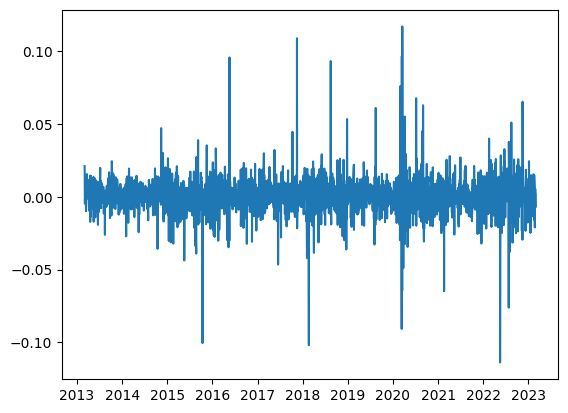

In [9]:
daily_returns = data.Close.pct_change()
daily_returns.plot()

Text(0, 0.5, 'Counts')

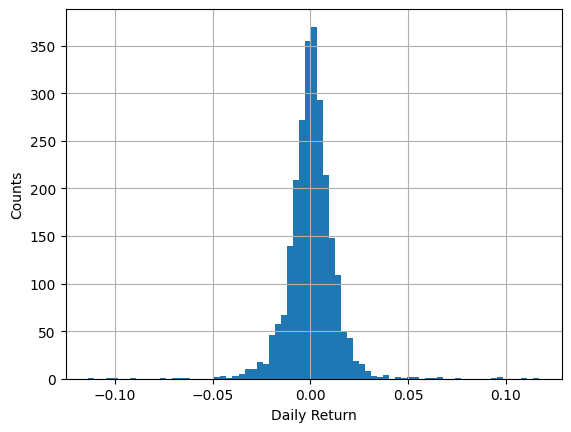

In [10]:

daily_returns.hist(bins=75)
plt.xlabel('Daily Return')
plt.ylabel('Counts')

#### Analysis of Close Price based on Year, Quarter, Month & Week

In [11]:
data.index = pd.to_datetime(data.index)
monthly_mean = data['Close'].resample('M').mean()
monthly_data = monthly_mean.to_frame()
monthly_data.head(10)

Close
2013-03-31  73.436499
2013-04-30  77.689546
2013-05-31  77.816364
2013-06-30  74.978000
2013-07-31  77.115454
2013-08-31  75.224092
2013-09-30  74.439500
2013-10-31  74.979131
2013-11-30  78.973001
2013-12-31  78.775238

In [12]:
monthly_data['Year'] = monthly_data.index.year
monthly_data['Month'] = monthly_data.index.strftime('%B')
monthly_data['dayofweek'] = monthly_data.index.strftime('%A')
monthly_data['quarter'] = monthly_data.index.quarter
monthly_data.head(10)

Close  Year      Month  dayofweek  quarter
2013-03-31  73.436499  2013      March     Sunday        1
2013-04-30  77.689546  2013      April    Tuesday        2
2013-05-31  77.816364  2013        May     Friday        2
2013-06-30  74.978000  2013       June     Sunday        2
2013-07-31  77.115454  2013       July  Wednesday        3
2013-08-31  75.224092  2013     August   Saturday        3
2013-09-30  74.439500  2013  September     Monday        3
2013-10-31  74.979131  2013    October   Thursday        4
2013-11-30  78.973001  2013   November   Saturday        4
2013-12-31  78.775238  2013   December    Tuesday        4

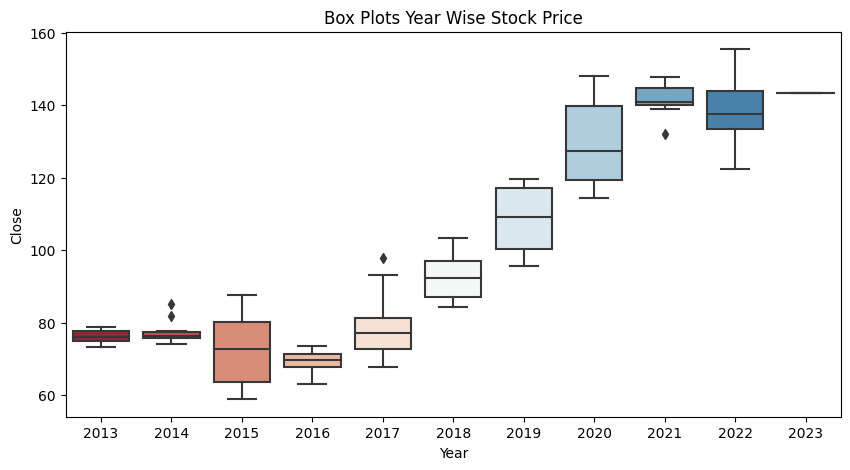

In [13]:
plt.figure(figsize=(10,5))
ax = sns.boxplot(x=monthly_data['Year'],y=monthly_data['Close'],palette='RdBu')
ax.set_title('Box Plots Year Wise Stock Price')
plt.style.context('fivethirtyeight')

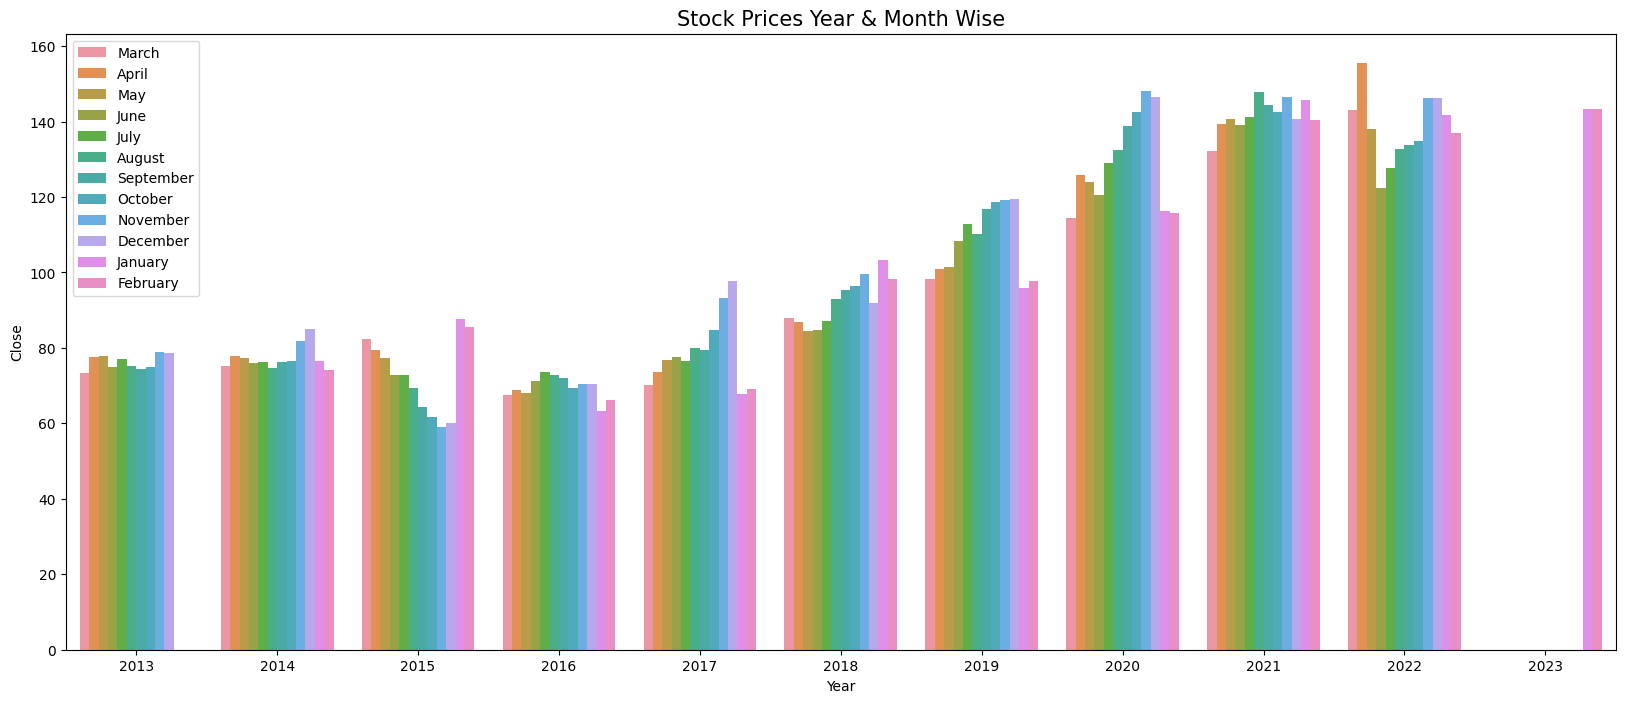

In [14]:
fig, ax = plt.subplots(figsize=(20,8))
palette = sns.color_palette("mako_r", 4)
a = sns.barplot(x="Year", y="Close",hue = 'Month',data=monthly_data)
a.set_title("Stock Prices Year & Month Wise",fontsize=15)
plt.legend(loc='upper left')
plt.show()

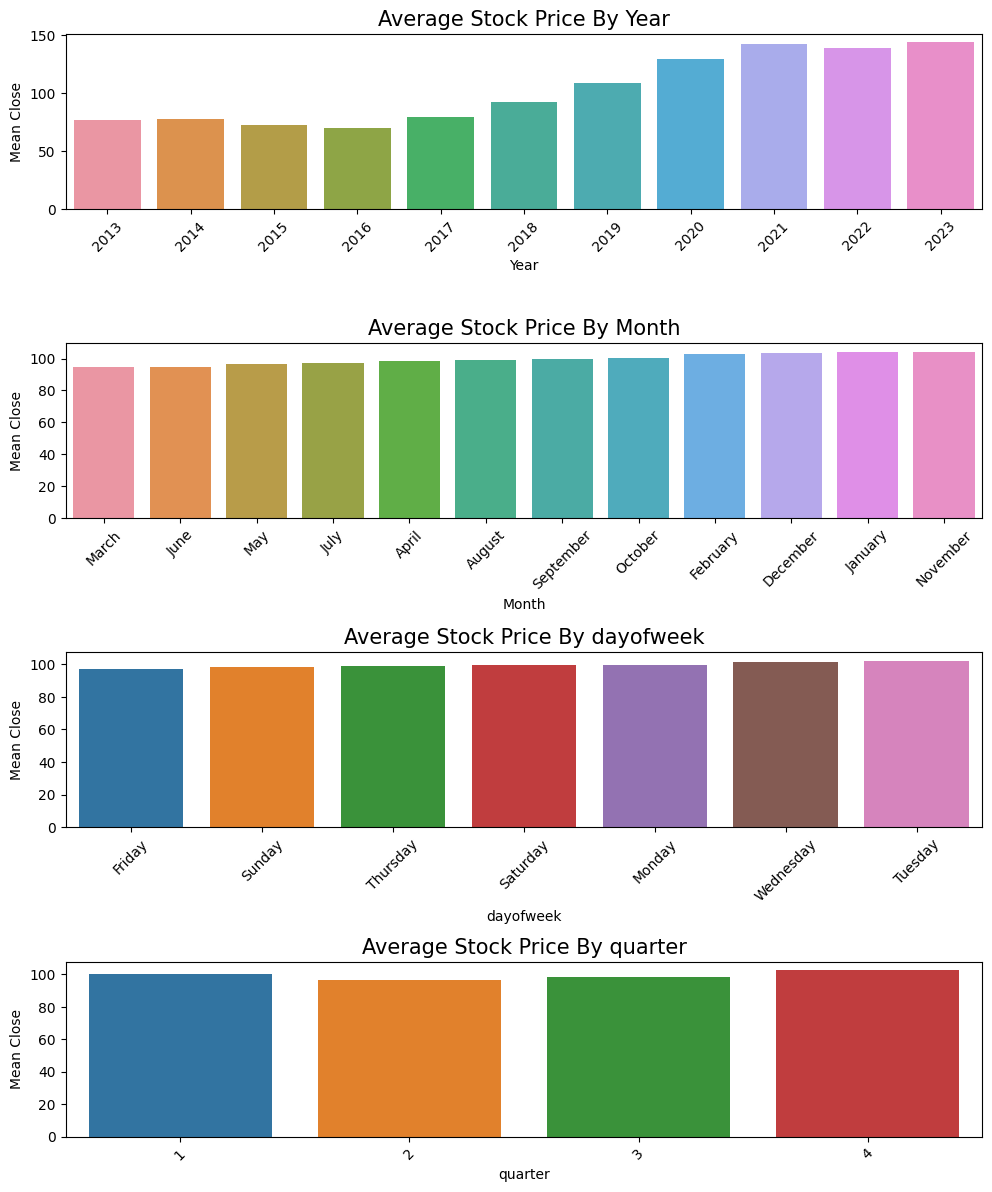

In [15]:
fig = plt.figure(figsize=(10,8))
fig.set_size_inches(10,12)
group_cols = monthly_data.columns

for enum,i in enumerate(group_cols[1:]):
  ax = fig.add_subplot(4,1,enum+1)
  Aggregated = pd.DataFrame(monthly_data.groupby(str(i))["Close"].mean()).reset_index().sort_values('Close')
  sns.barplot(data=Aggregated,x=str(i),y="Close",ax=ax)
  ax.set(xlabel=str(i), ylabel='Mean Close')
  ax.set_title("Average Stock Price By {}".format(str(i)),fontsize=15)
  plt.xticks(rotation=45)
  
plt.tight_layout(pad=1)

## We will only use certain indicators from the original dataset

In [16]:
stockCloseVolume = data.drop(columns=["Open", "High", "Low", "Adj Close", "200MA"]).copy()
stockCloseVolume

Close    Volume        30MA      50MA     EMA_0.3
2013-03-01   71.739998   8902300         NaN       NaN   71.739998
2013-03-04   73.260002  10567200         NaN       NaN   72.195999
2013-03-05   73.720001   9142000         NaN       NaN   72.653200
2013-03-06   73.379997   7149600         NaN       NaN   72.871239
2013-03-07   73.320000   6680000         NaN       NaN   73.005867
...                ...       ...         ...       ...         ...
2023-02-22  144.240005   9948000  143.420334  143.7778  145.330001
2023-02-23  142.089996   7340400  143.328000  143.7134  144.358000
2023-02-24  142.470001   6874500  143.206000  143.6024  143.791600
2023-02-27  141.440002   5549100  143.093667  143.4814  143.086121
2023-02-28  142.130005   6018000  142.988334  143.3906  142.799286

[2517 rows x 5 columns]

### Retrieve from FRED Database (US Economics and market data)

In [17]:
# Replace YOUR_API_KEY with your FRED API key
fred = Fred(api_key='47bd175ac2732acae3621b3c48848ff4')

# Retrieve daily close price of stock market indexes

sp500 = fred.get_series('SP500', observation_start = start_date, 
                        observation_end = end_date)

#Dow Jones Composite Average
djca = fred.get_series('DJCA', observation_start = start_date, 
                       observation_end = end_date) 

treasury_10y = fred.get_series('DGS10', observation_start = start_date, 
                               observation_end = end_date)

marketData = pd.DataFrame({'S&P500': sp500, 'DowJones': djca,
                        '10Y_Treasury_Rate': treasury_10y})

marketData = marketData.dropna()

marketData

S&P500  DowJones  10Y_Treasury_Rate
2013-03-28  1569.19   5036.94               1.87
2013-04-01  1562.17   5011.37               1.86
2013-04-02  1570.25   5011.22               1.88
2013-04-03  1553.69   4968.36               1.83
2013-04-04  1559.98   4987.32               1.78
...             ...       ...                ...
2023-02-23  4012.32  11180.26               3.88
2023-02-24  3970.04  11095.39               3.95
2023-02-27  3982.24  11141.21               3.92
2023-02-28  3970.15  11048.13               3.92
2023-03-01  3951.39  11031.18               4.01

[2480 rows x 3 columns]

In [18]:
combined_data = pd.concat([stockCloseVolume, marketData], axis=1).ffill()
combined_data

Close      Volume        30MA      50MA     EMA_0.3   S&P500  \
2013-03-01   71.739998   8902300.0         NaN       NaN   71.739998      NaN   
2013-03-04   73.260002  10567200.0         NaN       NaN   72.195999      NaN   
2013-03-05   73.720001   9142000.0         NaN       NaN   72.653200      NaN   
2013-03-06   73.379997   7149600.0         NaN       NaN   72.871239      NaN   
2013-03-07   73.320000   6680000.0         NaN       NaN   73.005867      NaN   
...                ...         ...         ...       ...         ...      ...   
2023-02-23  142.089996   7340400.0  143.328000  143.7134  144.358000  4012.32   
2023-02-24  142.470001   6874500.0  143.206000  143.6024  143.791600  3970.04   
2023-02-27  141.440002   5549100.0  143.093667  143.4814  143.086121  3982.24   
2023-02-28  142.130005   6018000.0  142.988334  143.3906  142.799286  3970.15   
2023-03-01  142.130005   6018000.0  142.988334  143.3906  142.799286  3951.39   

            DowJones  10Y_Treasury_Rate  
2013-03-01       NaN                NaN  
2013-03-04       NaN                NaN  
2013-03-05       NaN                NaN  
2013-03-06       NaN                NaN  
2013-03-07       NaN                NaN  
...              ...                ...  
2023-02-23  11180.26               3.88  
2023-02-24  11095.39               3.95  
2023-02-27  11141.21               3.92  
2023-02-28  11048.13               3.92  
2023-03-01  11031.18               4.01  

[2518 rows x 8 columns]

## TA-Lib Technical Indicators

In [19]:
# Compute the Relative Strength Index (RSI)
rsi = talib.RSI(data['Close'], timeperiod=14)

# Compute the Moving Average Convergence Divergence (MACD)
macd, macdsignal, macdhist = talib.MACD(data['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

# Compute the Upper and Lower Bollinger Bands
upper, middle, lower = talib.BBANDS(data['Close'], timeperiod=20, nbdevup=2, nbdevdn=2)

# Compute Stochastic Oscillator
stochK, stochD = talib.STOCH(data['High'], data['Low'], data['Close'], 
                                  fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3)

# Compute Average Directional Index (ADX)
adx = talib.ADX(data['High'], data['Low'], data['Close'])

# Compute Chaikin Oscillator
chaikin = talib.ADOSC(data['High'], data['Low'], data['Close'], data['Volume'])

# Compute On-Balance Volume (OBV)
obv = talib.OBV(data['Close'], data['Volume'])

# Add the technical indicators to the DataFrame
combined_data['RSI'] = rsi
combined_data['MACD'] = macd
combined_data['MACD_Signal'] = macdsignal
combined_data['MACD_Histogram'] = macdhist
combined_data['Upper_Bollinger_Band'] = upper
combined_data['Middle_Bollinger_Band'] = middle
combined_data['Lower_Bollinger_Band'] = lower
combined_data['Stoch_K'] = stochK
combined_data['Stoch_D'] = stochD
combined_data['ADX'] = adx
combined_data['Chaikin_Osc'] = chaikin
combined_data['OBV'] = obv

combined_data

Close      Volume        30MA      50MA     EMA_0.3   S&P500  \
2013-03-01   71.739998   8902300.0         NaN       NaN   71.739998      NaN   
2013-03-04   73.260002  10567200.0         NaN       NaN   72.195999      NaN   
2013-03-05   73.720001   9142000.0         NaN       NaN   72.653200      NaN   
2013-03-06   73.379997   7149600.0         NaN       NaN   72.871239      NaN   
2013-03-07   73.320000   6680000.0         NaN       NaN   73.005867      NaN   
...                ...         ...         ...       ...         ...      ...   
2023-02-23  142.089996   7340400.0  143.328000  143.7134  144.358000  4012.32   
2023-02-24  142.470001   6874500.0  143.206000  143.6024  143.791600  3970.04   
2023-02-27  141.440002   5549100.0  143.093667  143.4814  143.086121  3982.24   
2023-02-28  142.130005   6018000.0  142.988334  143.3906  142.799286  3970.15   
2023-03-01  142.130005   6018000.0  142.988334  143.3906  142.799286  3951.39   

            DowJones  10Y_Treasury_Rate        RSI      MACD  MACD_Signal  \
2013-03-01       NaN                NaN        NaN       NaN          NaN   
2013-03-04       NaN                NaN        NaN       NaN          NaN   
2013-03-05       NaN                NaN        NaN       NaN          NaN   
2013-03-06       NaN                NaN        NaN       NaN          NaN   
2013-03-07       NaN                NaN        NaN       NaN          NaN   
...              ...                ...        ...       ...          ...   
2023-02-23  11180.26               3.88  45.429024  0.347590     0.218991   
2023-02-24  11095.39               3.95  46.466383  0.180939     0.211381   
2023-02-27  11141.21               3.92  44.023599 -0.033854     0.162334   
2023-02-28  11048.13               3.92  46.069022 -0.146711     0.100525   
2023-03-01  11031.18               4.01        NaN       NaN          NaN   

            MACD_Histogram  Upper_Bollinger_Band  Middle_Bollinger_Band  \
2013-03-01             NaN                   NaN                    NaN   
2013-03-04             NaN                   NaN                    NaN   
2013-03-05             NaN                   NaN                    NaN   
2013-03-06             NaN                   NaN                    NaN   
2013-03-07             NaN                   NaN                    NaN   
...                    ...                   ...                    ...   
2023-02-23        0.128599            147.620526             143.549501   
2023-02-24       -0.030441            147.617964             143.562501   
2023-02-27       -0.196188            147.628757             143.469501   
2023-02-28       -0.247236            147.629034             143.468501   
2023-03-01             NaN                   NaN                    NaN   

            Lower_Bollinger_Band    Stoch_K    Stoch_D        ADX  \
2013-03-01                   NaN        NaN        NaN        NaN   
2013-03-04                   NaN        NaN        NaN        NaN   
2013-03-05                   NaN        NaN        NaN        NaN   
2013-03-06                   NaN        NaN        NaN        NaN   
2013-03-07                   NaN        NaN        NaN        NaN   
...                          ...        ...        ...        ...   
2023-02-23            139.478476  45.178051  59.136057  14.979887   
2023-02-24            139.507037  28.407302  46.090445  14.731114   
2023-02-27            139.310245  24.379184  32.654846  14.316796   
2023-02-28            139.307968  29.129838  27.305441  13.932072   
2023-03-01                   NaN        NaN        NaN        NaN   

             Chaikin_Osc         OBV  
2013-03-01           NaN   8902300.0  
2013-03-04           NaN  19469500.0  
2013-03-05           NaN  28611500.0  
2013-03-06           NaN  21461900.0  
2013-03-07           NaN  14781900.0  
...                  ...         ...  
2023-02-23  6.452815e+06  53415200.0  
2023-02-24  7.098057e+06  60289700.0  
2023-02-27  6.084606e+06  54740600.0  

In [20]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2518 entries, 2013-03-01 to 2023-03-01
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Close                  2518 non-null   float64
 1   Volume                 2518 non-null   float64
 2   30MA                   2489 non-null   float64
 3   50MA                   2469 non-null   float64
 4   EMA_0.3                2518 non-null   float64
 5   S&P500                 2499 non-null   float64
 6   DowJones               2499 non-null   float64
 7   10Y_Treasury_Rate      2499 non-null   float64
 8   RSI                    2503 non-null   float64
 9   MACD                   2484 non-null   float64
 10  MACD_Signal            2484 non-null   float64
 11  MACD_Histogram         2484 non-null   float64
 12  Upper_Bollinger_Band   2498 non-null   float64
 13  Middle_Bollinger_Band  2498 non-null   float64
 14  Lower_Bollinger_Band   2498 non-null  

### Remove the null values at the front of the dataset caused by the technical indicators

In [21]:
filtered_data = combined_data[49:-1]
filtered_data

Close      Volume        30MA      50MA     EMA_0.3   S&P500  \
2013-05-10   78.889999   5831200.0   77.938000   76.1374   78.629598  1633.70   
2013-05-13   78.500000   7713900.0   78.040334   76.2726   78.590718  1633.77   
2013-05-14   78.779999  10013700.0   78.132334   76.3830   78.647502  1650.34   
2013-05-15   79.860001   8001100.0   78.261000   76.5058   79.011252  1658.78   
2013-05-16   78.500000  12128600.0   78.337667   76.6082   78.857876  1650.47   
...                ...         ...         ...       ...         ...      ...   
2023-02-22  144.240005   9948000.0  143.420334  143.7778  145.330001  3991.05   
2023-02-23  142.089996   7340400.0  143.328000  143.7134  144.358000  4012.32   
2023-02-24  142.470001   6874500.0  143.206000  143.6024  143.791600  3970.04   
2023-02-27  141.440002   5549100.0  143.093667  143.4814  143.086121  3982.24   
2023-02-28  142.130005   6018000.0  142.988334  143.3906  142.799286  3970.15   

            DowJones  10Y_Treasury_Rate        RSI      MACD  MACD_Signal  \
2013-05-10   5171.51               1.90  59.041063  0.718386     0.888648   
2013-05-13   5153.04               1.92  55.696785  0.665330     0.843984   
2013-05-14   5209.41               1.96  57.555638  0.638516     0.802891   
2013-05-15   5239.72               1.94  63.855179  0.696385     0.781589   
2013-05-16   5211.34               1.87  53.156205  0.625298     0.750331   
...              ...                ...        ...       ...          ...   
2023-02-22  11134.50               3.93  50.578128  0.593931     0.186841   
2023-02-23  11180.26               3.88  45.429024  0.347590     0.218991   
2023-02-24  11095.39               3.95  46.466383  0.180939     0.211381   
2023-02-27  11141.21               3.92  44.023599 -0.033854     0.162334   
2023-02-28  11048.13               3.92  46.069022 -0.146711     0.100525   

            MACD_Histogram  Upper_Bollinger_Band  Middle_Bollinger_Band  \
2013-05-10       -0.170262             79.428770              78.448500   
2013-05-13       -0.178654             79.430489              78.450000   
2013-05-14       -0.164375             79.441133              78.455000   
2013-05-15       -0.085205             79.683721              78.522500   
2013-05-16       -0.125033             79.568938              78.589500   
...                    ...                   ...                    ...   
2023-02-22        0.407090            147.616526             143.562001   
2023-02-23        0.128599            147.620526             143.549501   
2023-02-24       -0.030441            147.617964             143.562501   
2023-02-27       -0.196188            147.628757             143.469501   
2023-02-28       -0.247236            147.629034             143.468501   

            Lower_Bollinger_Band    Stoch_K    Stoch_D        ADX  \
2013-05-10             77.468231  50.102234  51.400146  28.969314   
2013-05-13             77.469512  57.706538  51.376622  26.994208   
2013-05-14             77.468868  73.140761  60.316511  25.320617   
2013-05-15             77.361280  78.206999  69.684766  24.632424   
2013-05-16             77.610062  75.318219  75.555326  23.343213   
...                          ...        ...        ...        ...   
2023-02-22            139.507476  64.685983  67.455863  15.789934   
2023-02-23            139.478476  45.178051  59.136057  14.979887   
2023-02-24            139.507037  28.407302  46.090445  14.731114   
2023-02-27            139.310245  24.379184  32.654846  14.316796   
2023-02-28            139.307968  29.129838  27.305441  13.932072   

             Chaikin_Osc         OBV  
2013-05-10  3.218257e+05  64236900.0  
2013-05-13  1.363231e+06  56523000.0  
2013-05-14  4.423106e+06  66536700.0  
2013-05-15  7.429909e+06  74537800.0  
2013-05-16  1.001563e+07  62409200.0  
...                  ...         ...  
2023-02-22  7.888953e+06  60755600.0  
2023-02-23  6.452815e+06  53415200.0  
2023-02-24  7.098057e+06  60289700.0  

In [22]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2468 entries, 2013-05-10 to 2023-02-28
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Close                  2468 non-null   float64
 1   Volume                 2468 non-null   float64
 2   30MA                   2468 non-null   float64
 3   50MA                   2468 non-null   float64
 4   EMA_0.3                2468 non-null   float64
 5   S&P500                 2468 non-null   float64
 6   DowJones               2468 non-null   float64
 7   10Y_Treasury_Rate      2468 non-null   float64
 8   RSI                    2468 non-null   float64
 9   MACD                   2468 non-null   float64
 10  MACD_Signal            2468 non-null   float64
 11  MACD_Histogram         2468 non-null   float64
 12  Upper_Bollinger_Band   2468 non-null   float64
 13  Middle_Bollinger_Band  2468 non-null   float64
 14  Lower_Bollinger_Band   2468 non-null  

In [23]:
filtered_data.describe().applymap("{0:.5f}".format).T

count           mean              std  \
Close                  2468.00000      100.01492         28.72537   
Volume                 2468.00000  8133237.15559    4627218.77810   
30MA                   2468.00000       99.63250         28.42980   
50MA                   2468.00000       99.35964         28.24437   
EMA_0.3                2468.00000       99.95415         28.65911   
S&P500                 2468.00000     2806.39084        863.93217   
DowJones               2468.00000     8104.62135       2055.80968   
10Y_Treasury_Rate      2468.00000        2.18636          0.72363   
RSI                    2468.00000       52.01263         12.09407   
MACD                   2468.00000        0.18862          1.37584   
MACD_Signal            2468.00000        0.18997          1.28047   
MACD_Histogram         2468.00000       -0.00135          0.45097   
Upper_Bollinger_Band   2468.00000      103.55246         30.10939   
Middle_Bollinger_Band  2468.00000       99.76415         28.52719   
Lower_Bollinger_Band   2468.00000       95.97585         27.16845   
Stoch_K                2468.00000       51.43252         24.63721   
Stoch_D                2468.00000       51.44167         22.79707   
ADX                    2468.00000       24.31857          9.35983   
Chaikin_Osc            2468.00000  -467319.58502    6197061.87174   
OBV                    2468.00000  2899911.18314  107125490.51861   

                                    min              25%             50%  \
Close                          56.42000         75.34750        88.96000   
Volume                    2094900.00000    5679450.00000   6956450.00000   
30MA                           58.64333         75.64200        88.52850   
50MA                           59.03620         75.78145        88.47180   
EMA_0.3                        57.41199         75.46642        88.77211   
S&P500                       1573.09000       2076.26250      2657.71000   
DowJones                     4918.16000       6271.99500      8040.60000   
10Y_Treasury_Rate               0.52000          1.72000         2.25500   
RSI                            15.90841         43.43668        52.00273   
MACD                           -8.07471         -0.54028         0.20191   
MACD_Signal                    -6.51254         -0.50564         0.20736   
MACD_Histogram                 -3.96238         -0.21443         0.00654   
Upper_Bollinger_Band           59.33301         77.36823        91.56062   
Middle_Bollinger_Band          58.02000         75.51062        88.58050   
Lower_Bollinger_Band           53.13329         73.18703        85.29734   
Stoch_K                         2.47574         30.96760        51.78926   
Stoch_D                         4.24586         32.47189        51.95212   
ADX                             7.27983         17.12308        22.50610   
Chaikin_Osc             -33254385.47944   -3491751.76127   -208902.18582   
OBV                    -328952900.00000  -45357175.00000  20962200.00000   

                                  75%              max  
Close                       129.12500        159.87000  
Volume                  9203450.00000   80898100.00000  
30MA                        127.03300        153.93867  
50MA                        126.62750        150.03180  
EMA_0.3                     129.05890        158.05376  
S&P500                     3381.09750       4796.56000  
DowJones                   9490.42750      12360.33000  
10Y_Treasury_Rate             2.69000          4.25000  
RSI                          60.26088         84.75950  
MACD                          0.93547          4.23868  
MACD_Signal                   0.92499          3.82010  
MACD_Histogram                0.22238          1.57963  
Upper_Bollinger_Band        134.66312        170.14728  
Middle_Bollinger_Band       127.97575        155.77200  
Lower_Bollinger_Band        120.45412        151.50673  
Stoch_K                      72.55958         96.94089  
Stoch_D     

<AxesSubplot:>

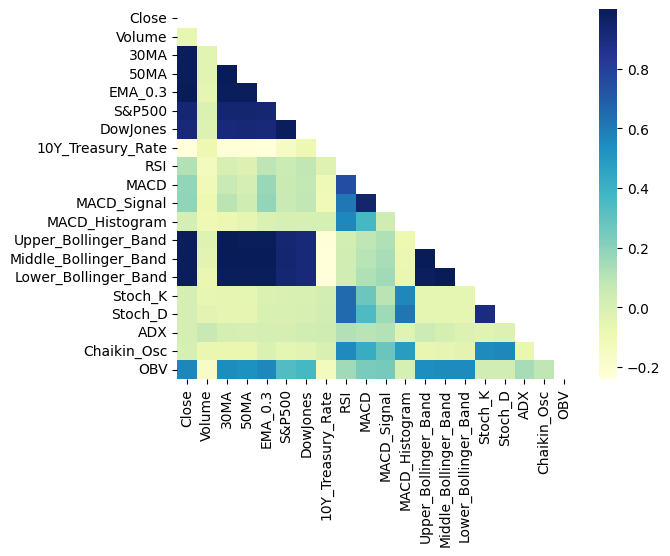

In [24]:
mask = np.triu(np.ones_like(filtered_data.corr()))
sns.heatmap(filtered_data.corr(), mask=mask, cmap="YlGnBu")

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# data['Date'] = pd.to_datetime(data['Date']).astype('int32')
scaler = StandardScaler()

# columns = ['Volume','30MA','50MA','EMA_0.3','S&P500','DowJones','10Y_Treasury_Rate','RSI', 'MACD', 'MACD_Signal','MACD_Histogram',
#            'Upper_Bollinger_Band','Middle_Bollinger_Band','Lower_Bollinger_Band',
#            'Stoch_K','Stoch_D','ADX','Chaikin_Osc','OBV']
# X = filtered_data[columns]
X = filtered_data.drop(columns=["Close"]).copy()
X = scaler.fit_transform(X)

y = pd.DataFrame(filtered_data['Close'])
# y = scaler.fit_transform(y)

print(X.shape)
print(y.shape)

(2468, 19)
(2468, 1)


### Dimensionality Reduction using Principal Component Analysis (PCA)

In [26]:
from sklearn.decomposition import PCA

n_components = len(filtered_data.columns)-1
pca = PCA(n_components = n_components).fit(X)

np.set_printoptions(suppress=True)
np.round(pca.explained_variance_ratio_, 2)

array([0.43, 0.21, 0.09, 0.06, 0.06, 0.05, 0.04, 0.03, 0.03, 0.01, 0.01,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

#### Especially with time series data, because the sequence of values is important, we do not distribute the dataset into training and test sets in random fashion. Instead, we select an arbitrary split point in the ordered list of observations.

#### Hence, shuffle = False for train_test_split is a very crucial step.

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1727, 19)
(1727, 1)
(741, 19)
(741, 1)


In [28]:
def evaluate_model_rmse(model_type, test_size=0.3):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=False)
    model = model_type
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_predict, squared=False)
    return rmse

evaluate_model_rmse(LinearRegression())

1.0456612124913094

#### Instead of a vanilla linear regression, a comprehensive alternative is to use the LazyRegressor library to demonstrate the efficiency of various ML algorithms with just a few lines of codes.

In [29]:
from lazypredict.Supervised import LazyRegressor

reg = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = reg.fit(X_train, X_test, y_train, y_test)

models

100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [03:28<00:00,  4.97s/it]


Adjusted R-Squared  R-Squared   RMSE  \
Model                                                                 
LassoLarsIC                                  0.99       0.99   1.04   
TransformedTargetRegressor                   0.99       0.99   1.05   
LinearRegression                             0.99       0.99   1.05   
BayesianRidge                                0.99       0.99   1.05   
RidgeCV                                      0.99       0.99   1.06   
LassoLarsCV                                  0.99       0.99   1.06   
RANSACRegressor                              0.99       0.99   1.06   
Ridge                                        0.99       0.99   1.11   
HuberRegressor                               0.98       0.98   1.17   
SGDRegressor                                 0.98       0.98   1.21   
LinearSVR                                    0.98       0.98   1.23   
LassoCV                                      0.98       0.98   1.32   
PassiveAggressiveRegressor                   0.97       0.97   1.46   
OrthogonalMatchingPursuitCV                  0.97       0.97   1.46   
LarsCV                                       0.97       0.97   1.47   
ElasticNetCV                                 0.97       0.97   1.55   
OrthogonalMatchingPursuit                    0.96       0.96   1.93   
Lasso                                        0.82       0.82   3.91   
GammaRegressor                               0.79       0.79   4.21   
PoissonRegressor                             0.22       0.24   8.03   
ElasticNet                                   0.10       0.13   8.63   
TweedieRegressor                            -0.16      -0.13   9.82   
ExtraTreeRegressor                          -4.09      -3.96  20.57   
RandomForestRegressor                       -4.22      -4.09  20.84   
BaggingRegressor                            -4.29      -4.15  20.97   
DecisionTreeRegressor                       -4.46      -4.32  21.29   
HistGradientBoostingRegressor               -4.89      -4.74  22.13   
ExtraTreesRegressor                         -4.96      -4.81  22.26   
GradientBoostingRegressor                   -4.98      -4.83  22.30   
LGBMRegressor                               -5.10      -4.94  22.52   
AdaBoostRegressor                           -5.33      -5.17  22.94   
XGBRegressor                                -5.40      -5.24  23.07   
KNeighborsRegressor                         -5.53      -5.37  23.30   
Lars                                       -17.89     -17.41  39.63   
NuSVR                                      -25.70     -25.02  47.11   
SVR                                        -26.10     -25.40  47.46   
LassoLars                                  -36.14     -35.19  55.56   
DummyRegressor                             -36.14     -35.19  55.56   
QuantileRegressor                          -43.65     -42.50  60.92   
MLPRegressor                               -46.88     -45.65  63.08   
KernelRidge                                -83.11     -80.95  83.61   
GaussianProcessRegressor                  -228.41    -222.52 138.09   

                               Time Taken  
Model                                      
LassoLarsIC                          0.03  
TransformedTargetRegressor           0.02  
LinearRegression                     0.02  
BayesianRidge                        0.02  
RidgeCV                              0.03  
LassoLarsCV                          0.05  
RANSACRegressor                      0.06  
Ridge                                0.01  
HuberRegressor                       0.09  
SGDRegressor                         0.02  
LinearSVR                            0.08  
LassoCV                              0.07  
PassiveAggressiveRegressor           0.01  
OrthogonalMatchingPursuitCV          0.02  
LarsCV                               0.03  
ElasticNetCV                         0.08  
OrthogonalMatchingPursuit            0.01  
Lasso                                0.01  
GammaRegressor            

# Regression & ensemble learning

In [30]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.neural_network import MLPRegressor

In [31]:
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('RIDGE', Ridge()))
models.append(('EN', ElasticNet()))
models.append(('KNR', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))
models.append(('RFR', RandomForestRegressor()))
models.append(('BR', BaggingRegressor()))
models.append(('ABR', AdaBoostRegressor()))
models.append(('GBR', GradientBoostingRegressor()))
models.append(('ETR', ExtraTreesRegressor()))
models.append(('XGB', XGBRegressor()))
models.append(('LGBM', LGBMRegressor()))
models.append(('CBR', CatBoostRegressor(silent=True)))
models.append(('MLP', MLPRegressor()))

In [32]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

#### Instead of KFold, TimeSeriesSplit is used due to the sequential nature of the dataset.

In [33]:
model_names, TS_split_results, test_results, train_results = [], [], [], []
num_folds = 5
scoring = 'neg_mean_squared_error'
row_list=[]
# results = pd.DataFrame(columns=['Names','CV_mean','CV_std','Train_RMSE','Test_RMSE'])

print("Model | Mean | Std | Train Results | Test Results")

for name, model in models:
    model_names.append(name)
    TS_split = TimeSeriesSplit(n_splits=num_folds)

    #converted mean square error to positive before converting to RMSE
    cv_results = np.sqrt(-1 * cross_val_score(model, X_train, y_train, cv=TS_split, scoring=scoring))
    TS_split_results.append(cv_results)

    # Full Training period
    res = model.fit(X_train, y_train)
    train_result = mean_squared_error(y_train, res.predict(X_train), squared=False)
    train_results.append(train_result)

    # Test results
    test_result = mean_squared_error(y_test, res.predict(X_test), squared=False)
    test_results.append(test_result)

    dict1={'Names':name,'CV_mean':cv_results.mean(),'CV_std':cv_results.std(),'Train_RMSE':train_result,'Test_RMSE':test_result}
    row_list.append(dict1)
    # results.append({'names':[name],'CV_mean':[cv_results.mean()],'CV_std': [cv_results.std()],'train_RMSE': [train_result], 'test_RMSE':[test_result]},ignore_index=True)
    
    model_comparisons = "%s: %f %f %f %f" % (name, cv_results.mean(), cv_results.std(), train_result, test_result)
    print(model_comparisons)

Model | Mean | Std | Train Results | Test Results
LR: 0.604153 0.156057 0.480881 1.045661
LASSO: 10.491102 4.672384 2.413304 13.903583
RIDGE: 0.938699 0.575890 0.512731 1.167665
EN: 10.445115 4.864150 3.570845 20.302719
KNR: 9.405213 4.568885 1.088995 25.217763
CART: 5.095878 3.657210 0.000000 21.233651
SVR: 9.670447 5.539651 2.292461 41.375751
RFR: 4.702026 3.102972 0.237671 20.824287
BR: 4.938765 3.445967 0.283633 20.760665
ABR: 4.926758 3.157828 1.079975 23.164433
GBR: 4.695269 2.890216 0.325782 22.302825
ETR: 4.486067 2.894570 0.000000 22.695163
XGB: 4.602302 2.866831 0.061132 23.071078
LGBM: 5.011775 3.005126 0.176618 22.132045
CBR: 6.984345 4.100382 0.130962 27.484200
MLP: 36.833798 17.799162 8.712384 15.941585


In [34]:
results = pd.DataFrame(row_list)
results = results.set_index('Names')
results.round(4)
results

CV_mean  CV_std  Train_RMSE  Test_RMSE
Names                                        
LR        0.60    0.16        0.48       1.05
LASSO    10.49    4.67        2.41      13.90
RIDGE     0.94    0.58        0.51       1.17
EN       10.45    4.86        3.57      20.30
KNR       9.41    4.57        1.09      25.22
CART      5.10    3.66        0.00      21.23
SVR       9.67    5.54        2.29      41.38
RFR       4.70    3.10        0.24      20.82
BR        4.94    3.45        0.28      20.76
ABR       4.93    3.16        1.08      23.16
GBR       4.70    2.89        0.33      22.30
ETR       4.49    2.89        0.00      22.70
XGB       4.60    2.87        0.06      23.07
LGBM      5.01    3.01        0.18      22.13
CBR       6.98    4.10        0.13      27.48
MLP      36.83   17.80        8.71      15.94

#### Ensemble learning methods generally outperform regression techniques, with multi-layer preceptron performing the worst when evaluating RMSE.

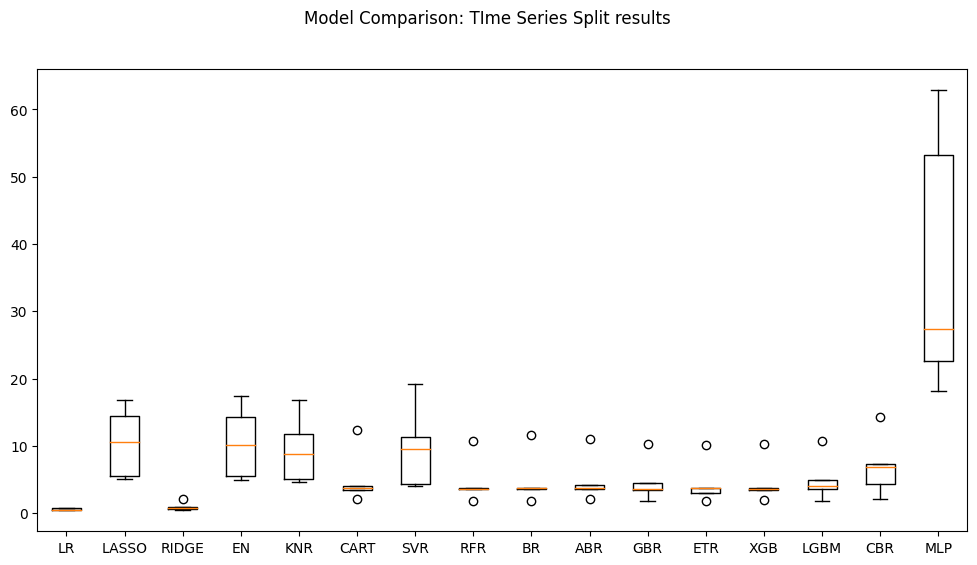

In [35]:
fig = plt.figure()
fig.suptitle('Model Comparison: TIme Series Split results')
ax = fig.add_subplot(111)
plt.boxplot(TS_split_results)
ax.set_xticklabels(model_names)
fig.set_size_inches(12, 6)
plt.show()

In [36]:
def plot_models_RMSE(model_names=model_names, train_results=train_results, test_results=test_results):
    fig = plt.figure()
    ind = np.arange(len(model_names))
    width = 0.1
    ax = fig.add_subplot(111)

    plt.bar(ind - width/2, train_results, width=width, label='Train Error')
    plt.bar(ind + width/2, test_results, width=width, label='Test Error')
    plt.legend()
    ax.set_xticks(ind)
    ax.set_xticklabels(model_names)
    plt.ylabel('Root Mean Square Error')
    fig.set_size_inches(12, 6)
    plt.show()

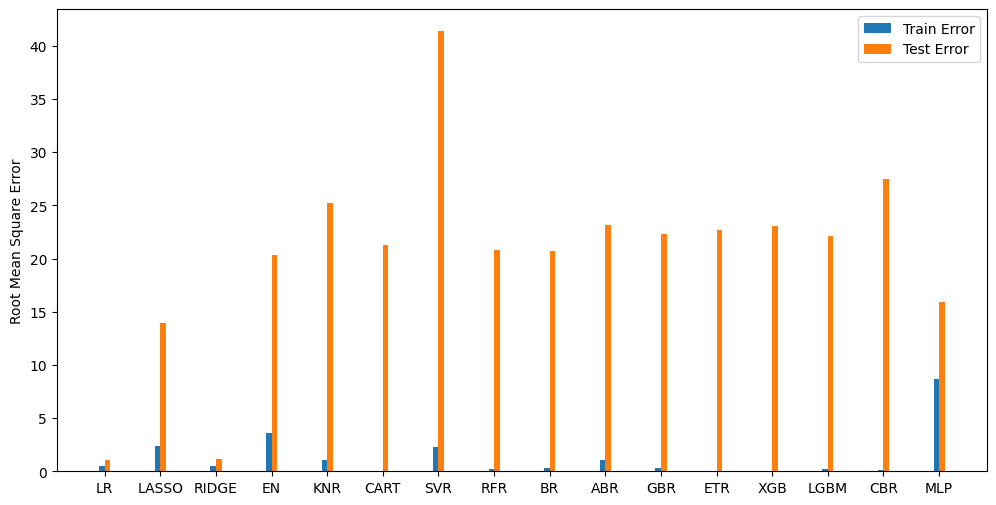

In [37]:
plot_models_RMSE()

# ARIMA

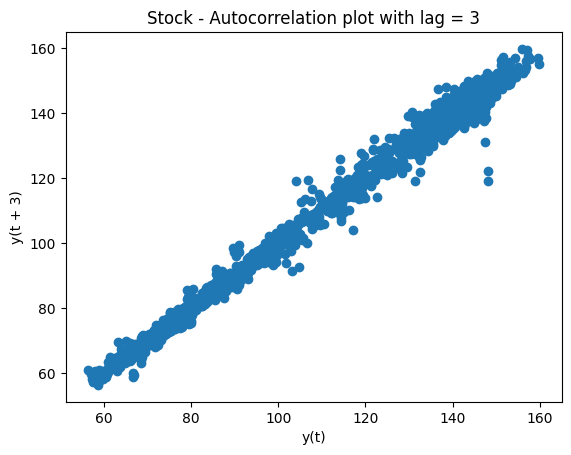

In [38]:
from pandas.plotting import lag_plot

plt.figure()
lag_plot(data['Close'], lag=3)
plt.title('Stock - Autocorrelation plot with lag = 3')
plt.show()

In [39]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import itertools

In [40]:
result = adfuller(y)
print(result,'\n')

print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')  

for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
if result[0] < result[4]["5%"]:
    print ("\nReject Ho - Time Series is Stationary")
else:
    print ("\nFailed to Reject Ho - Time Series is Non-Stationary")

(-0.7379816851917593, 0.8366646577452033, 9, 2458, {'1%': -3.433013198647963, '5%': -2.862716578179761, '10%': -2.5673963396253145}, 8628.373262349367) 

ADF Statistic: -0.7379816851917593
n_lags: 0.8366646577452033
p-value: 0.8366646577452033
Critial Values:
   1%, -3.433013198647963
Critial Values:
   5%, -2.862716578179761
Critial Values:
   10%, -2.5673963396253145
	1%: -3.433
	5%: -2.863
	10%: -2.567

Failed to Reject Ho - Time Series is Non-Stationary


#### ACF measures the average correlation between data points and their previous values for different lag lengths.
#### PACF is similar to ACF except that each partial correlation controls for any correlation between observations of a shorter lag length.

Text(0.5, 0, 'Lags')

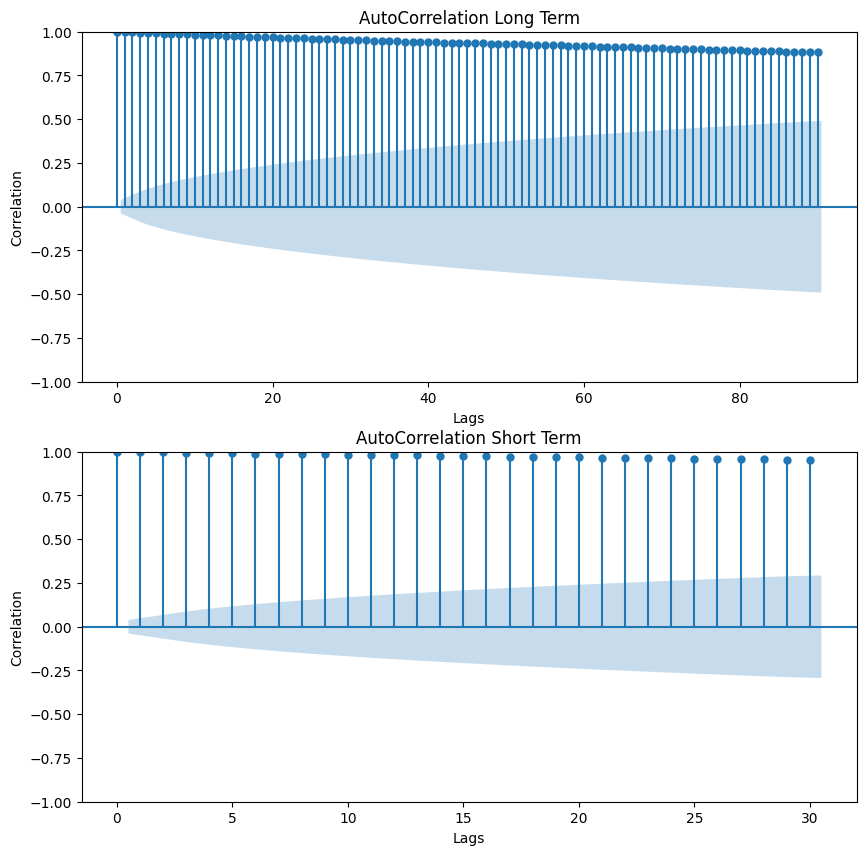

In [41]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig,(ax1,ax2) = plt.subplots(2,figsize=(10,10))

acf = plot_acf(data['Close'],lags=90,ax=ax1)
ax1.set_title('AutoCorrelation Long Term')
acf = plot_acf(data['Close'],lags=30,ax=ax2)
ax2.set_title('AutoCorrelation Short Term')

ax1.set_ylabel('Correlation')
ax1.set_xlabel('Lags')
ax2.set_ylabel('Correlation')
ax2.set_xlabel('Lags')

Text(0.5, 0, 'Lags')

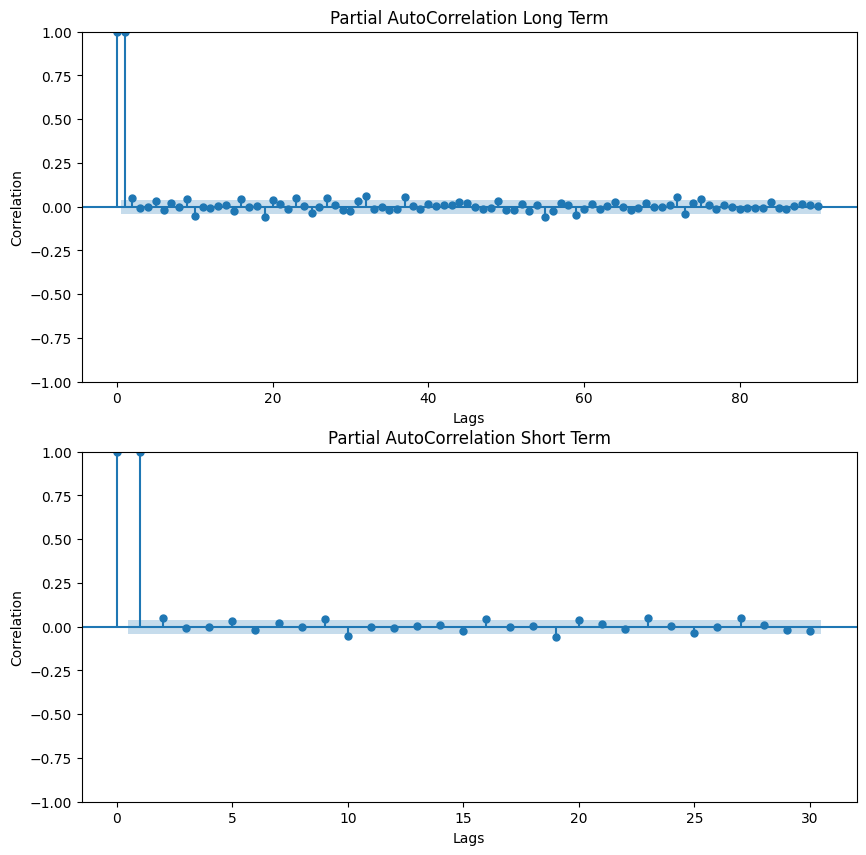

In [42]:
fig,(ax1,ax2) = plt.subplots(2,figsize=(10,10))

pacf = plot_pacf(data['Close'],lags=90,ax=ax1)
ax1.set_title('Partial AutoCorrelation Long Term')
pacf = plot_pacf(data['Close'],lags=30,ax=ax2)
ax2.set_title('Partial AutoCorrelation Short Term')

ax1.set_ylabel('Correlation')
ax1.set_xlabel('Lags')
ax2.set_ylabel('Correlation')
ax2.set_xlabel('Lags')

<Figure size 640x480 with 0 Axes>

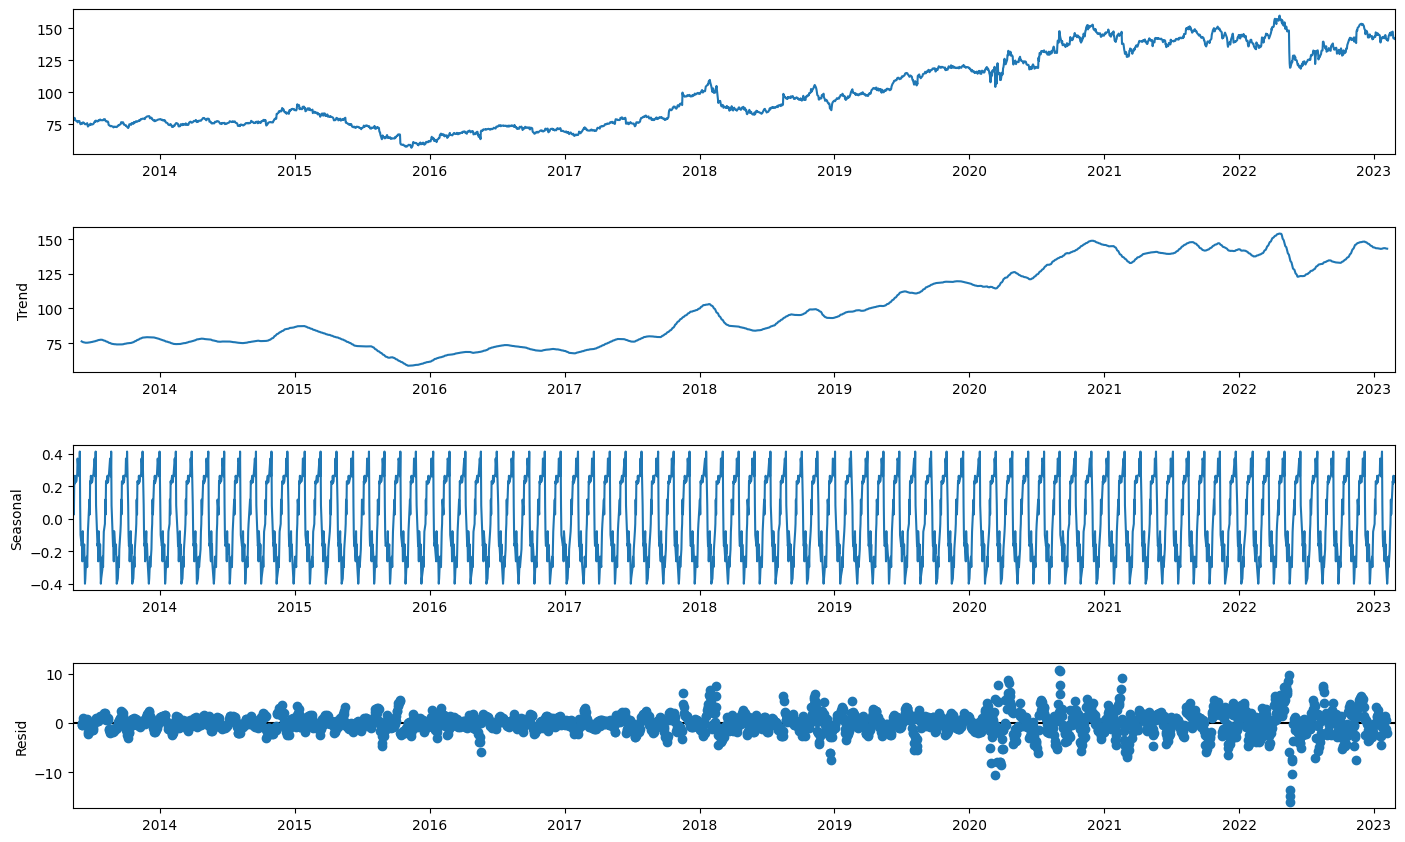

In [43]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(y, model='addictivee', period=30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

In [44]:
p = d = q = range(3)
# p = d = range(3)
# q = range(5)
pdq = list(itertools.product(p, d, q))
print(len(pdq))
print(pdq)

27
[(0, 0, 0), (0, 0, 1), (0, 0, 2), (0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 2, 0), (0, 2, 1), (0, 2, 2), (1, 0, 0), (1, 0, 1), (1, 0, 2), (1, 1, 0), (1, 1, 1), (1, 1, 2), (1, 2, 0), (1, 2, 1), (1, 2, 2), (2, 0, 0), (2, 0, 1), (2, 0, 2), (2, 1, 0), (2, 1, 1), (2, 1, 2), (2, 2, 0), (2, 2, 1), (2, 2, 2)]


In [45]:
import warnings
warnings.filterwarnings("ignore")

In [46]:
ARIMA_train_best, ARIMA_test_best, best_pdq = float("inf"), float("inf"), None

for param in pdq:
    arima = ARIMA(y_train, order=param).fit()
    ARIMA_train_results = mean_squared_error(y_train, arima.fittedvalues, squared=False)
    
    output = arima.predict(end=len(y_test)-1)
    ARIMA_test_results = mean_squared_error(y_test, output, squared=False)
    
    if ARIMA_test_results < ARIMA_test_best:
            ARIMA_train_best, ARIMA_test_best, best_pdq = ARIMA_train_results, ARIMA_test_results, param

    print(f'Model {param} | Train RMSE: {ARIMA_train_results :.5f} | Test RMSE: {ARIMA_test_results :.5f}')
print(f"\nBest ARIMA Model: {best_pdq} | Train RMSE: {ARIMA_train_best :.5f} | Test RMSE: {ARIMA_test_best :.5f}")

Model (0, 0, 0) | Train RMSE: 15.51848 | Test RMSE: 55.56226
Model (0, 0, 1) | Train RMSE: 8.16878 | Test RMSE: 60.00935
Model (0, 0, 2) | Train RMSE: 5.02005 | Test RMSE: 62.04445
Model (0, 1, 0) | Train RMSE: 2.20328 | Test RMSE: 65.00579
Model (0, 1, 1) | Train RMSE: 2.19703 | Test RMSE: 65.00381
Model (0, 1, 2) | Train RMSE: 2.19696 | Test RMSE: 65.00413
Model (0, 2, 0) | Train RMSE: 2.71871 | Test RMSE: 65.00919
Model (0, 2, 1) | Train RMSE: 2.40323 | Test RMSE: 65.01194
Model (0, 2, 2) | Train RMSE: 2.39749 | Test RMSE: 65.01349
Model (1, 0, 0) | Train RMSE: 1.12387 | Test RMSE: 64.87001
Model (1, 0, 1) | Train RMSE: 1.11169 | Test RMSE: 64.87521
Model (1, 0, 2) | Train RMSE: 1.11153 | Test RMSE: 64.87444
Model (1, 1, 0) | Train RMSE: 2.19692 | Test RMSE: 65.00414
Model (1, 1, 1) | Train RMSE: 2.19692 | Test RMSE: 65.00414
Model (1, 1, 2) | Train RMSE: 2.19692 | Test RMSE: 65.00413
Model (1, 2, 0) | Train RMSE: 2.53898 | Test RMSE: 65.00824
Model (1, 2, 1) | Train RMSE: 2.39740 |

In [47]:
ARIMA_train_best, ARIMA_test_best, best_pdq = float("inf"), float("inf"), None

for param in pdq:
    arima = ARIMA(y_train, order=param).fit()
    ARIMA_train_results = mean_squared_error(y_train, arima.fittedvalues, squared=False)
    
    output = arima.forecast(steps=len(y_test))
    ARIMA_test_results = mean_squared_error(y_test, output, squared=False)
    
    if ARIMA_test_results < ARIMA_test_best:
            ARIMA_train_best, ARIMA_test_best, best_pdq = ARIMA_train_results, ARIMA_test_results, param

    print(f'Model {param} | Train RMSE: {ARIMA_train_results :.5f} | Test RMSE: {ARIMA_test_results :.5f}')
print(f"\nBest ARIMA Model: {best_pdq} | Train RMSE: {ARIMA_train_best :.5f} | Test RMSE: {ARIMA_test_best :.5f}")

Model (0, 0, 0) | Train RMSE: 15.51848 | Test RMSE: 55.56226
Model (0, 0, 1) | Train RMSE: 8.16878 | Test RMSE: 55.53953
Model (0, 0, 2) | Train RMSE: 5.02005 | Test RMSE: 55.53728
Model (0, 1, 0) | Train RMSE: 2.20328 | Test RMSE: 21.03973
Model (0, 1, 1) | Train RMSE: 2.19703 | Test RMSE: 20.72343
Model (0, 1, 2) | Train RMSE: 2.19696 | Test RMSE: 20.65350
Model (0, 2, 0) | Train RMSE: 2.71871 | Test RMSE: 1358.19048
Model (0, 2, 1) | Train RMSE: 2.40323 | Test RMSE: 13.12611
Model (0, 2, 2) | Train RMSE: 2.39749 | Test RMSE: 11.36778
Model (1, 0, 0) | Train RMSE: 1.12387 | Test RMSE: 32.52547
Model (1, 0, 1) | Train RMSE: 1.11169 | Test RMSE: 24.28545
Model (1, 0, 2) | Train RMSE: 1.11153 | Test RMSE: 25.43889
Model (1, 1, 0) | Train RMSE: 2.19692 | Test RMSE: 20.67416
Model (1, 1, 1) | Train RMSE: 2.19692 | Test RMSE: 20.67408
Model (1, 1, 2) | Train RMSE: 2.19692 | Test RMSE: 20.67855
Model (1, 2, 0) | Train RMSE: 2.53898 | Test RMSE: 347.97689
Model (1, 2, 1) | Train RMSE: 2.3974

In [48]:
train_results.append(ARIMA_train_best)
test_results.append(ARIMA_test_best)
model_names.append("ARIMA")

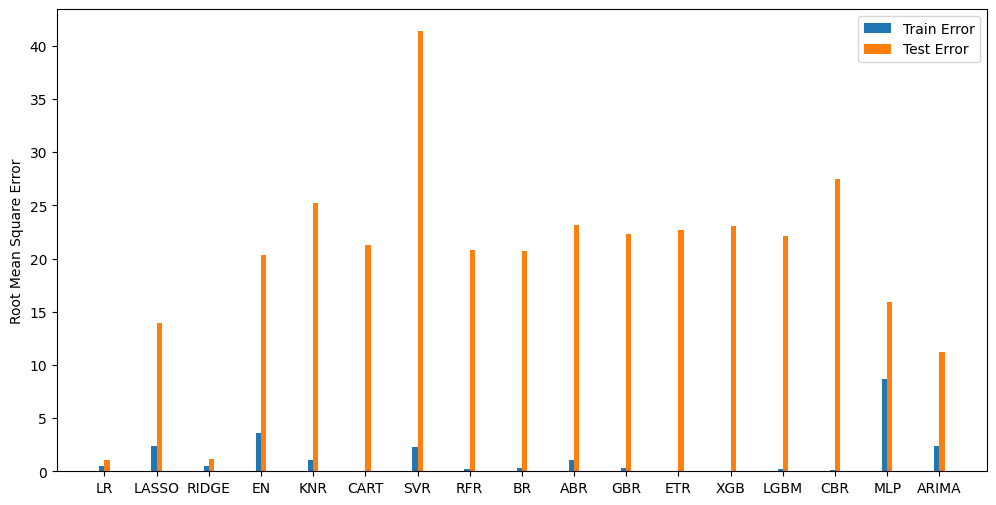

In [49]:
plot_models_RMSE()

#### It can be inferred from the graph above that ARIMA performs worse than ensemble learning methods.

In [50]:
model = ARIMA(y_train, order=best_pdq)
fitted = model.fit()  
print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1727
Model:                 ARIMA(2, 2, 2)   Log Likelihood               -2622.369
Date:                Tue, 28 Mar 2023   AIC                           5254.738
Time:                        18:37:15   BIC                           5282.003
Sample:                             0   HQIC                          5264.824
                               - 1727                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0268      0.056    -18.497      0.000      -1.136      -0.918
ar.L2         -0.1622      0.010    -16.265      0.000      -0.182      -0.143
ma.L1         -0.1247      0.059     -2.111      0.0

#### Alternatively, the most accurate ARIMA model can be configured below.

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5288.539, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5251.246, Time=0.17 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5251.878, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5287.301, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=5253.246, Time=0.15 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5253.246, Time=0.19 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=5255.244, Time=0.23 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=5250.301, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=5252.300, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=5252.301, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=5250.973, Time=0.10 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=5254.300, Time=0.12 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 1.390 seconds
                               SARIMAX Results                                
Dep. Vari

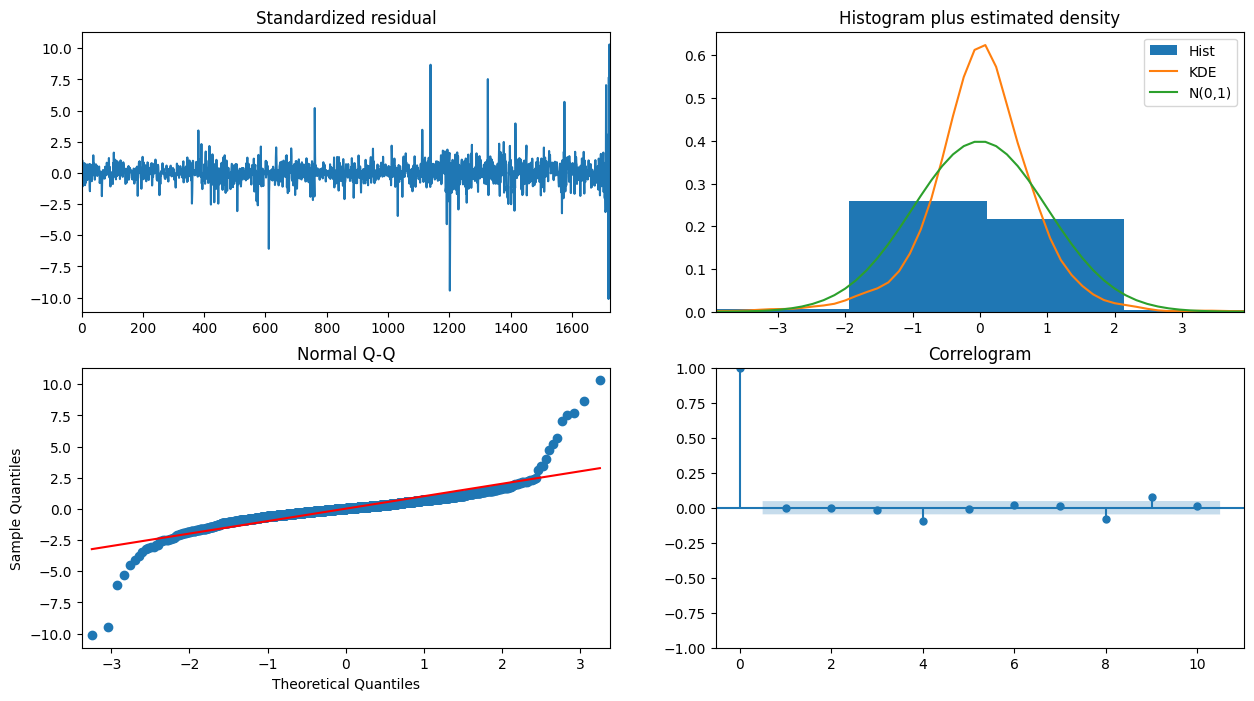

In [51]:
from pmdarima.arima import auto_arima

model_autoARIMA = auto_arima(y_train, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

# PyTorch LSTM

In [52]:
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler

In [53]:
scaler = MinMaxScaler()
ClosePrice = pd.DataFrame(data['Close'])

# Create training and testing datasets (70% train & 30% test)
train_split, test_split = train_test_split(ClosePrice, test_size=0.3, shuffle=False)
train = scaler.fit_transform(train_split)
test = scaler.fit_transform(test_split)

print(train.shape)
print(test.shape)

(1761, 1)
(756, 1)


#### For time series in LSTM, a "look back period" can be specified to predict the subsequent timestep value.

In [54]:
def create_dataset(dataset, look_back):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

look_back = 10
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

print('trainX.shape = ',trainX.shape)
print('trainY.shape = ',trainY.shape)
print('testX.shape = ',testX.shape)
print('testY.shape = ',testY.shape)

trainX.shape =  (1750, 10)
trainY.shape =  (1750,)
testX.shape =  (745, 10)
testY.shape =  (745,)


#### The values to feed into the LSTM must be converted into tensors beforehand.

In [55]:
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
trainY = np.reshape(trainY, (trainY.shape[0], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))
testY = np.reshape(testY, (testY.shape[0], 1))

# Convert data to PyTorch tensors
trainX = torch.from_numpy(trainX).float()
trainY = torch.from_numpy(trainY).float()
testX = torch.from_numpy(testX).float()
testY = torch.from_numpy(testY).float()

print('trainX.shape = ',trainX.shape)
print('trainY.shape = ',trainY.shape)
print('testX.shape = ',testX.shape)
print('testY.shape = ',testY.shape)

trainX.shape =  torch.Size([1750, 10, 1])
trainY.shape =  torch.Size([1750, 1])
testX.shape =  torch.Size([745, 10, 1])
testY.shape =  torch.Size([745, 1])


In [56]:
input_dim = 1 # The number of expected features in the input x (1 for univariate analysis)
hidden_dim = 50 # The number of features in the hidden state h
num_layers = 3 # Number of recurrent layers to formed a stacked LSTM
output_dim = 1
dropout_prob = 0.1
num_epochs = 100
learning_rate = 0.01

In [57]:
class LSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim, dropout_prob):
        super(LSTM, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True, dropout=dropout_prob) # bidirectional=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim)
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))
        out = self.fc(out[:, -1, :])
        return out

In [58]:
lstm_model = LSTM(input_dim, hidden_dim, num_layers, output_dim, dropout_prob)

print("Model's state_dict:")
for param_tensor in lstm_model.state_dict():
    print(param_tensor, "\t", lstm_model.state_dict()[param_tensor].size())

Model's state_dict:
lstm.weight_ih_l0 	 torch.Size([200, 1])
lstm.weight_hh_l0 	 torch.Size([200, 50])
lstm.bias_ih_l0 	 torch.Size([200])
lstm.bias_hh_l0 	 torch.Size([200])
lstm.weight_ih_l1 	 torch.Size([200, 50])
lstm.weight_hh_l1 	 torch.Size([200, 50])
lstm.bias_ih_l1 	 torch.Size([200])
lstm.bias_hh_l1 	 torch.Size([200])
lstm.weight_ih_l2 	 torch.Size([200, 50])
lstm.weight_hh_l2 	 torch.Size([200, 50])
lstm.bias_ih_l2 	 torch.Size([200])
lstm.bias_hh_l2 	 torch.Size([200])
fc.weight 	 torch.Size([1, 50])
fc.bias 	 torch.Size([1])


#### Training the LSTM Model

In [59]:
lstm_model = LSTM(input_dim, hidden_dim, num_layers, output_dim, dropout_prob)
criterion = nn.MSELoss(reduction='mean')
optimizer = torch.optim.Adam(lstm_model.parameters(), lr=learning_rate)
hist = np.zeros(num_epochs)

for epoch in range(1, num_epochs+1):
    
    lstm_model.train()
    
    trainY_pred = lstm_model(trainX)
    loss = torch.sqrt(criterion(trainY_pred, trainY))
    hist[epoch-1] = loss.item()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if epoch % 10 == 0:
        print(f"Epoch: {epoch}/{num_epochs}, Loss: {loss.item():.4f}")

Epoch: 10/100, Loss: 0.2321
Epoch: 20/100, Loss: 0.1286
Epoch: 30/100, Loss: 0.0862
Epoch: 40/100, Loss: 0.0538
Epoch: 50/100, Loss: 0.0350
Epoch: 60/100, Loss: 0.0305
Epoch: 70/100, Loss: 0.0298
Epoch: 80/100, Loss: 0.0285
Epoch: 90/100, Loss: 0.0269
Epoch: 100/100, Loss: 0.0303


In [60]:
train_actual = pd.DataFrame(scaler.inverse_transform(trainY.detach().numpy()))
print(train_actual.head())
train_pred = pd.DataFrame(scaler.inverse_transform(trainY_pred.detach().numpy()))
print(train_pred.head())

LSTM_train_RMSE = mean_squared_error(train_pred, train_actual, squared=False)
print()
print('LSTM Train RMSE:',LSTM_train_RMSE)

       0
0 117.89
1 117.67
2 117.85
3 118.31
4 118.43
       0
0 117.53
1 117.63
2 117.82
3 117.50
4 117.59

LSTM Train RMSE: 1.6906136


#### Plotting the error loss of all epochs

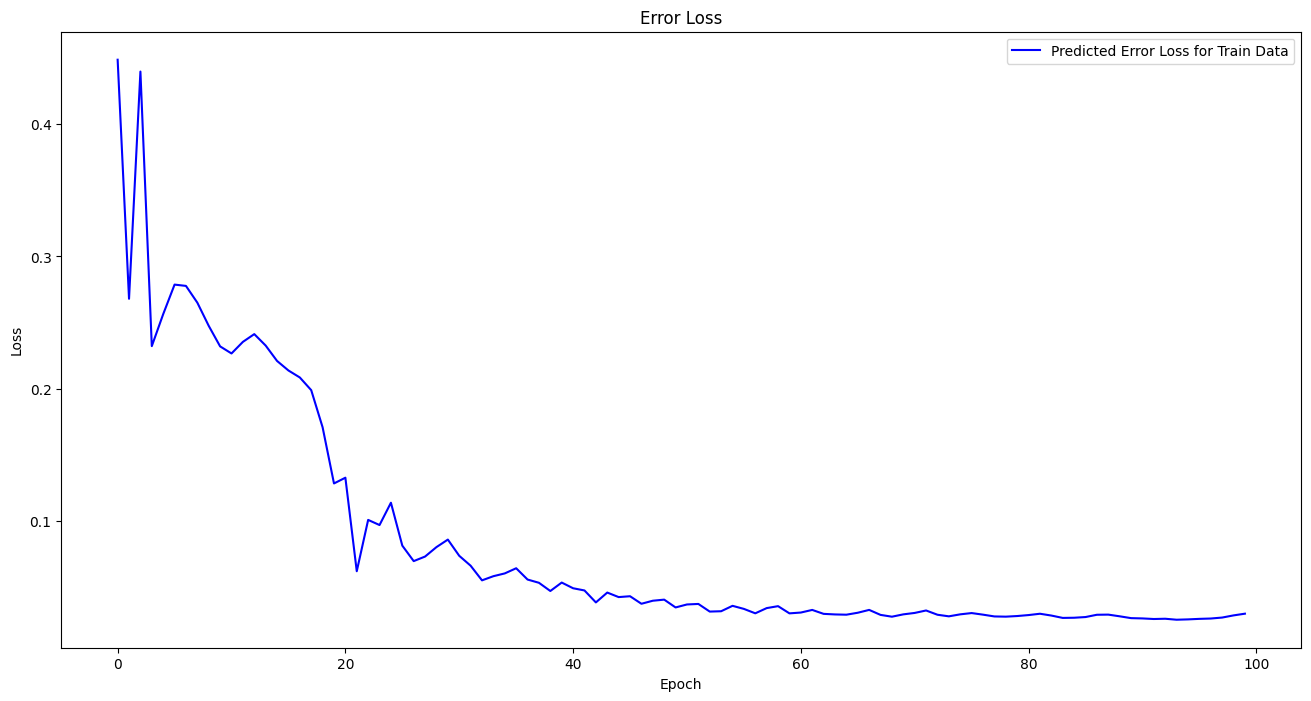

In [61]:
epochs = np.arange(num_epochs)
plt.figure(figsize=(16,8))
plt.plot(epochs, hist, color = 'blue', label = 'Predicted Error Loss for Train Data')
plt.title('Error Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Plotting the actual and predicted Close Price in the training phase
Accuracy can be improved by tuning the "look back period" specified earlier.

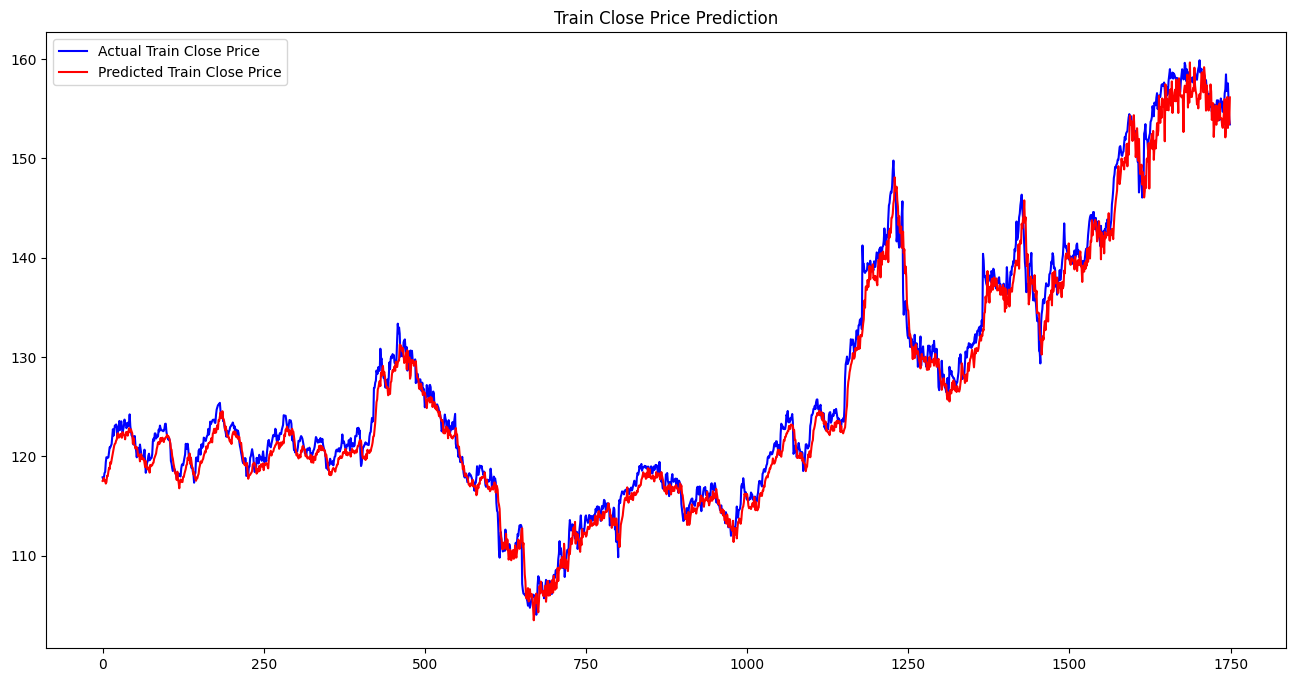

In [62]:
plt.figure(figsize=(16,8))
plt.plot(train_actual, color = 'blue', label = 'Actual Train Close Price')
plt.plot(train_pred, color = 'red', label = 'Predicted Train Close Price')
plt.title('Train Close Price Prediction')
plt.legend()
plt.show()

#### Evaluating the LSTM Model on the testing phase

In [63]:
lstm_model.eval()

testY_pred = lstm_model(testX)

test_actual = pd.DataFrame(scaler.inverse_transform(testY.detach().numpy()))
print(test_actual.head())
test_pred = pd.DataFrame(scaler.inverse_transform(testY_pred.detach().numpy()))
print(test_pred.head())

LSTM_test_RMSE = mean_squared_error(test_pred, test_actual, squared=False)
print()
print(LSTM_train_RMSE)

       0
0 114.10
1 106.76
2 119.26
3 122.58
4 119.45
       0
0 115.74
1 114.69
2 113.29
3 113.10
4 114.26

1.6906136


#### Save the trained model’s learned parameters using the code in the below cell.
It is recommended to save the model's trained parameters instead of the whole model.

In [64]:
save_model_name = "predict_stock_price_lstm_pytorch"
torch.save(lstm_model.state_dict(), save_model_name)

#### Plotting the actual and predicted Close Price in the training phase

Accuracy can be improved by tuning the layers in the LSTM Model.

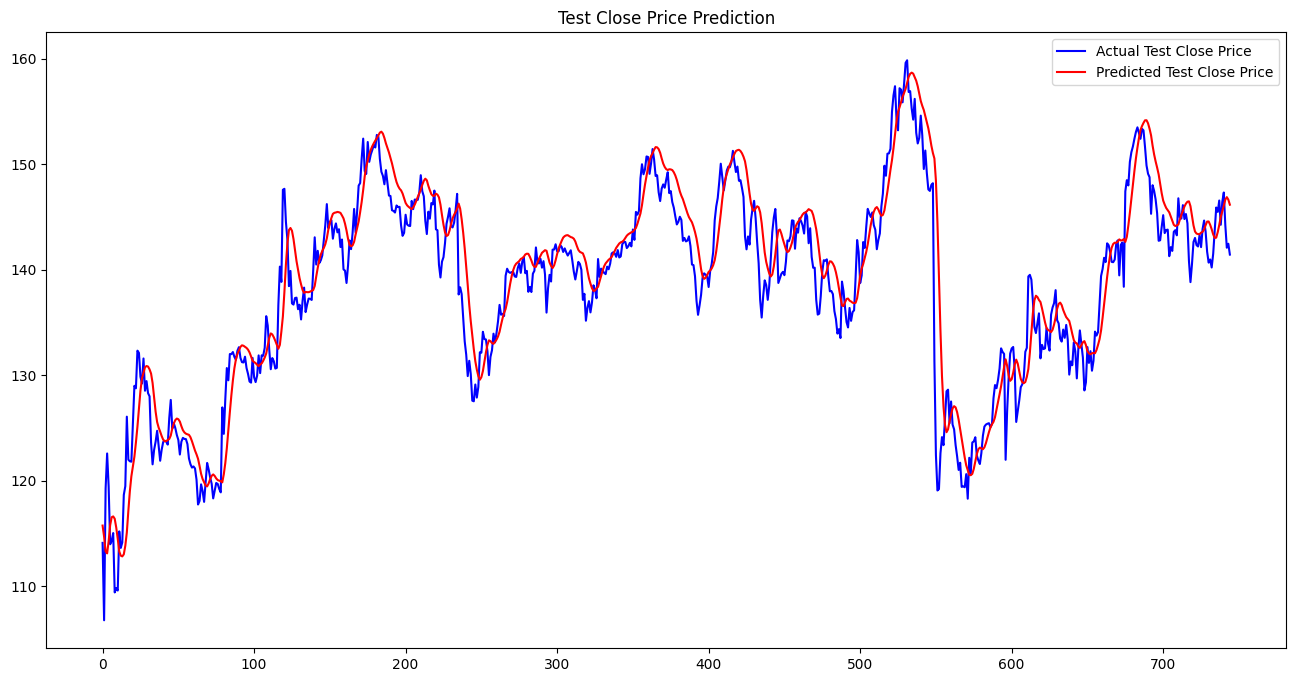

In [65]:
plt.figure(figsize=(16,8))
plt.plot(test_actual, color = 'blue', label = 'Actual Test Close Price')
plt.plot(test_pred, color = 'red', label = 'Predicted Test Close Price')
plt.title('Test Close Price Prediction')
plt.legend()
plt.show()

In [66]:
train_results.append(LSTM_train_RMSE)
test_results.append(LSTM_test_RMSE)
model_names.append("LSTM")

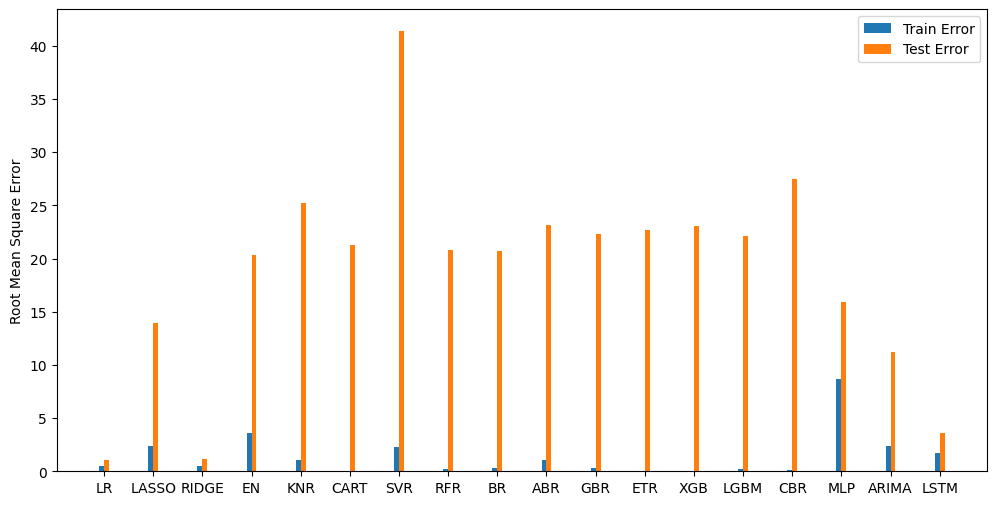

In [67]:
plot_models_RMSE()

#### From the graph above, it can be inferred that LSTM far outperform MLP and ARIMA.